# Clustering - Customer Segmentaiton
## Part 3. Data Wrangling - Item Level

<br id ='toc'>

**Table of Contents**
1. [Create item data](#item-features)
2. [Reduce dimensionality](#thres)
    1. [Threshold](#thres)
    2. [PCA](#pca)

In [58]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
tx_df = pd.read_csv('../data/cleaned_tx_df.csv')

In [3]:
tx_df.shape

(33698, 9)

In [4]:
tx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33698 entries, 0 to 33697
Data columns (total 9 columns):
InvoiceNo      33698 non-null int64
StockCode      33698 non-null object
Description    33698 non-null object
Quantity       33698 non-null int64
InvoiceDate    33698 non-null object
UnitPrice      33698 non-null float64
CustomerID     33698 non-null int64
Country        33698 non-null object
Sales          33698 non-null float64
dtypes: float64(2), int64(3), object(4)
memory usage: 2.3+ MB


In [6]:
tx_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583,France,10.2
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583,France,15.6


[back to top](#toc)
<a id = 'item-features'></a>
## 1. Create item data

In [8]:
item_df = pd.get_dummies(tx_df.StockCode)

In [9]:
item_df.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,...,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
item_df.loc[:, 'CustomerID'] = tx_df.CustomerID

In [12]:
item_df.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,...,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST,CustomerID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12583
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12583
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12583
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12583
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12583


In [15]:
item_df = item_df.groupby('CustomerID').sum()

In [16]:
item_df.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,...,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,5


In [17]:
item_df.sum()

10002        12
10120         1
10125        13
10133         5
10135         4
11001         8
15034         5
15036        19
15039         3
15044A        6
15044B        3
15044C        2
15044D        4
15056BL      50
15056N       35
15056P       24
15058A        9
15058B        8
15058C        4
15060B       12
16008        11
16011         3
16012         4
16014        10
16016        16
16045         8
16048         8
16054         2
16156L        6
16156S       12
           ... 
90098         1
90099         2
90108         1
90114         1
90120B        1
90145         2
90160A        1
90160B        1
90160C        1
90160D        1
90161B        1
90161C        1
90161D        1
90162A        1
90162B        1
90164A        1
90170         1
90173         1
90184B        1
90184C        1
90192         1
90201A        1
90201B        3
90201C        2
90201D        1
90202D        1
90204         1
C2            6
M            34
POST       1055
Length: 2574, dtype: int

In [18]:
item_df.to_csv('../data/item_data.csv')

[back to top](#toc)

<a id = 'thres'></a>
## 2. Reduce Demensionality
### 2.A. Threshold

In [28]:
# Save only most purchased items
item_df.sum().sort_values(ascending = False).head(20)

POST      1055
22326      271
22423      222
22554      197
22556      179
21731      169
22328      166
22629      160
22551      158
21212      143
20725      141
23084      140
20750      132
20719      128
20726      123
85099B     123
21080      122
22139      117
22630      115
22961      114
dtype: int64

In [24]:
top_20_items = item_df.sum().sort_values(ascending = False).head(20).index
top_20_items

Index(['POST', '22326', '22423', '22554', '22556', '21731', '22328', '22629',
       '22551', '21212', '20725', '23084', '20750', '20719', '20726', '85099B',
       '21080', '22139', '22630', '22961'],
      dtype='object')

In [29]:
threshold_item_data = item_df[top_20_items]
threshold_item_data.head()

,POST,22326,22423,22554,22556,21731,22328,22629,22551,21212,20725,23084,20750,20719,20726,85099B,21080,22139,22630,22961
CustomerID,,,,,,,,,,,,,,,,,,,,
12347,0,0,4,0,0,5,0,0,0,0,0,3,0,4,0,0,0,0,0,0
12348,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12349,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12350,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
12352,5,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [30]:
threshold_item_data.shape

(414, 20)

In [31]:
threshold_item_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 12347 to 17844
Data columns (total 20 columns):
POST      414 non-null uint8
22326     414 non-null uint8
22423     414 non-null uint8
22554     414 non-null uint8
22556     414 non-null uint8
21731     414 non-null uint8
22328     414 non-null uint8
22629     414 non-null uint8
22551     414 non-null uint8
21212     414 non-null uint8
20725     414 non-null uint8
23084     414 non-null uint8
20750     414 non-null uint8
20719     414 non-null uint8
20726     414 non-null uint8
85099B    414 non-null uint8
21080     414 non-null uint8
22139     414 non-null uint8
22630     414 non-null uint8
22961     414 non-null uint8
dtypes: uint8(20)
memory usage: 11.3 KB


In [32]:
threshold_item_data.to_csv('../data/threshold_item_data.csv')

[back to top](#toc)
<a id = 'pca'></a>
### 2.B. PCA

In [36]:
item_data = pd.read_csv('../data/item_data.csv', index_col = 0)

In [37]:
item_data.shape

(414, 2574)

In [38]:
item_data.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,...,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,5


In [42]:
scaler = StandardScaler()
item_data_scaled = scaler.fit_transform(item_data)

In [77]:
type(item_data_scaled)

numpy.ndarray

In [46]:
item_data_scaled[:3]

array([[-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.68068072],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183,  0.38776219],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999]])

In [47]:
pca = PCA()
pca.fit(item_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [49]:
pc_items = pca.transform(item_data_scaled)

In [50]:
pc_items.shape

(414, 414)

In [51]:
pc_items[:3]

array([[ 5.87614052e+00,  4.82891689e+00, -4.95545069e-01, ...,
        -6.62646278e-04, -4.43629806e-05,  1.41206491e-15],
       [-4.21983747e+00,  1.22621722e+00, -1.88191211e+00, ...,
        -2.11471782e-04, -2.69154340e-04, -6.08887940e-15],
       [-1.26084676e+00,  2.38766371e+00, -7.31483440e-02, ...,
         2.57750179e-04, -2.05682324e-04,  4.13905021e-15]])

In [55]:
pca.explained_variance_ratio_.sum()

1.0

In [56]:
cum_exp_var = np.cumsum(pca.explained_variance_ratio_)

In [57]:
cum_exp_var.shape

(414,)

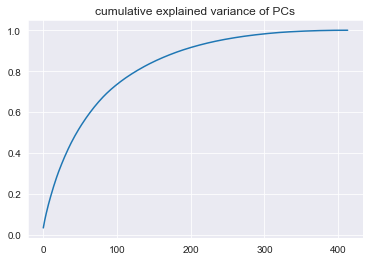

In [60]:
plt.plot(range(len(cum_exp_var)), cum_exp_var)
plt.title('cumulative explained variance of PCs')
plt.show()

In [62]:
(cum_exp_var<0.95).sum()

239

In [63]:
for t in [0.8, 0.9, 0.95, 0.99]:
    print ('Number of PCs to obtain {}% of total variance in data is: {}.'.format(t*100, sum(cum_exp_var < t)))

Number of PCs to obtain 80.0% of total variance in data is: 127.
Number of PCs to obtain 90.0% of total variance in data is: 187.
Number of PCs to obtain 95.0% of total variance in data is: 239.
Number of PCs to obtain 99.0% of total variance in data is: 324.


In [64]:
# choose 5% features that can capture 80% of the variance
pca = PCA(n_components=127)

In [65]:
pc_items = pca.fit_transform(item_data_scaled)

In [66]:
pc_items.shape

(414, 127)

In [72]:
pca_item_data = pd.DataFrame(pc_items)
pca_item_data.shape

(414, 127)

In [75]:
pca_item_data.columns = ["PC{}".format(i+1) for i in range(pca_item_data.shape[1])]
pca_item_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127
0,5.876139,4.828923,-0.495522,3.093840,-0.633760,-11.534044,2.161981,7.116815,5.335970,4.424404,...,-0.233783,-0.584289,-0.332693,-0.018121,-0.012031,0.319372,-0.228497,-0.181900,0.125802,0.007654
1,-4.219834,1.226168,-1.881946,-0.174253,0.817855,1.160770,-0.871799,-0.846682,0.460038,0.854503,...,-0.901531,-2.007518,-1.132574,-1.137798,1.077750,0.936439,0.139439,0.026970,0.780076,0.464609
2,-1.260855,2.387688,-0.073017,-1.119318,-0.033802,-3.714777,-0.343909,-0.149342,-0.789245,-0.379961,...,4.032227,-0.550180,-0.695411,-0.662426,5.959808,4.821094,-1.721362,2.923693,-4.922430,-1.929463
3,-4.929319,-0.714820,-1.580964,-0.469820,-0.116420,0.648000,0.112912,-1.336333,1.546848,-1.190465,...,-0.007665,0.448086,0.204818,-0.749806,-2.130448,0.870626,-0.470492,-1.031777,1.202488,1.705489
4,-2.053144,2.110828,0.184974,0.128380,0.087610,-1.943865,2.384714,0.898953,-0.672995,0.080393,...,-6.478849,-4.722140,-1.034470,6.360525,-6.582006,-2.422250,0.082824,-1.453668,-1.329513,-8.895094


In [79]:
pca_item_data.index = item_data.index

In [81]:
pca_item_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,5.876139,4.828923,-0.495522,3.093840,-0.633760,-11.534044,2.161981,7.116815,5.335970,4.424404,...,-0.233783,-0.584289,-0.332693,-0.018121,-0.012031,0.319372,-0.228497,-0.181900,0.125802,0.007654
12348,-4.219834,1.226168,-1.881946,-0.174253,0.817855,1.160770,-0.871799,-0.846682,0.460038,0.854503,...,-0.901531,-2.007518,-1.132574,-1.137798,1.077750,0.936439,0.139439,0.026970,0.780076,0.464609
12349,-1.260855,2.387688,-0.073017,-1.119318,-0.033802,-3.714777,-0.343909,-0.149342,-0.789245,-0.379961,...,4.032227,-0.550180,-0.695411,-0.662426,5.959808,4.821094,-1.721362,2.923693,-4.922430,-1.929463
12350,-4.929319,-0.714820,-1.580964,-0.469820,-0.116420,0.648000,0.112912,-1.336333,1.546848,-1.190465,...,-0.007665,0.448086,0.204818,-0.749806,-2.130448,0.870626,-0.470492,-1.031777,1.202488,1.705489
12352,-2.053144,2.110828,0.184974,0.128380,0.087610,-1.943865,2.384714,0.898953,-0.672995,0.080393,...,-6.478849,-4.722140,-1.034470,6.360525,-6.582006,-2.422250,0.082824,-1.453668,-1.329513,-8.895094


In [82]:
pca_item_data.to_csv('../data/pca_item_data.csv')

[back to top](#toc)